# Pizza price prediction

## Dataset


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [62]:
# Pizza data creation
pizza = pd.DataFrame(data={ 'size':[6,8,10,14,18], 'price':[7,9,13,17.5,18]})

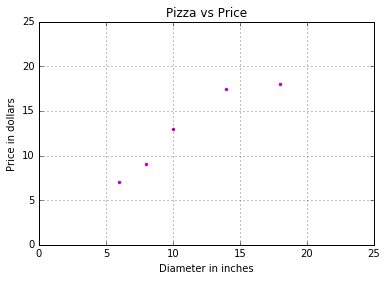

In [63]:
plt.figure()
plt.title('Pizza vs Price')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

plt.plot(pizza['size'], pizza['price'], 'm.')
plt.axis([0,25,0,25])
plt.grid(True)

#### Apply Simple Linear Regression of Pizza data to predict prices based on size

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
pizza_price_model = LinearRegression()

In [79]:
pizza_price_model.fit(pizza[['size']], pizza[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
pizza_price_model.predict([[12]])[0]

array([ 13.68103448])

### Evaluating the model
model.score(X,Y) - Close to 1 means better model

In [93]:
test_pizza = pd.DataFrame(data={ 'size':[7,12,15,24,28], 'price':[11,19,23,27.5,28]})
pizza_price_model.score(test_pizza[['size']],test_pizza[['price']])

0.59306162081714087

In [91]:
test_pizza_size = pd.DataFrame(data = {'size': range(10,50,2)})

In [89]:
test_pizza_price = pizza_price_model.predict(test_pizza)

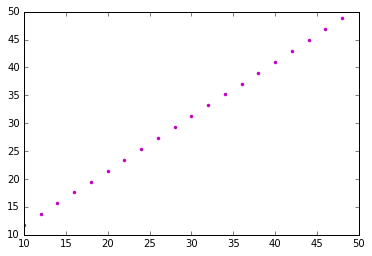

In [92]:
plt.plot(test_pizza_size, test_pizza_price, 'm.')

# Multiple Linear Regression

1. Improve the model to predict better
2. Cost of pizza is impacted by adding toppings
3. We need a generalized Simple Linear Regression that can use multiple feature variables or explanatory variables.
    <img src="http://3.bp.blogspot.com/-N5Rl3a87jgE/UTNCaRNMl3I/AAAAAAAAAcs/nJZVjAEiR3g/s1600/multi+regression+equation.png"/>

In [95]:
# Pizza data creation
pizza_new = pd.DataFrame(data={ 'size':[6,8,10,14,18], 'toppings':[2,1,0,2,0] , 'price':[7,9,13,17.5,18]})

In [96]:
pizza_new_model = LinearRegression()

In [98]:
pizza_new_model.fit(pizza_new[['size','toppings']],pizza_new[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
pizza_new_test = pd.DataFrame(data={ 'size':[8,9,11,16,12], 'toppings':[2,0,2,2,0] , 'price':[11,8.5,15,18,11]})
pizza_new_model.score(pizza_new[['size','toppings']], pizza_new[['price']])

0.91533779149519889

# Polynomial regression
1. As of now, the realtionship between explnatory variable & response variable is linear. This may not be always true.
2. This is a special case of multiple linear regression.
3. This adds terms with degree greater than one.

<img src="http://www.mathematics-monster.com/images3/quadratic_equation_graph.jpg">

4. We are using only one variable/feature

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
pizza

,price,size
0,7.0,6
1,9.0,8
2,13.0,10
3,17.5,14
4,18.0,18


In [109]:
pizza_test = pd.DataFrame(data = {'size':[6,8,11,16], 'price':[8,12,15,18]})

In [110]:
regressor = LinearRegression()

In [111]:
regressor.fit(pizza_test[['size']], pizza_test[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
xx = np.linspace(0,26,100)

In [118]:
# Convert into something that fir can understand
xx.reshape(xx.shape[0], 1)

array([[  0.        ],
       [  0.26262626],
       [  0.52525253],
       [  0.78787879],
       [  1.05050505],
       [  1.31313131],
       [  1.57575758],
       [  1.83838384],
       [  2.1010101 ],
       [  2.36363636],
       [  2.62626263],
       [  2.88888889],
       [  3.15151515],
       [  3.41414141],
       [  3.67676768],
       [  3.93939394],
       [  4.2020202 ],
       [  4.46464646],
       [  4.72727273],
       [  4.98989899],
       [  5.25252525],
       [  5.51515152],
       [  5.77777778],
       [  6.04040404],
       [  6.3030303 ],
       [  6.56565657],
       [  6.82828283],
       [  7.09090909],
       [  7.35353535],
       [  7.61616162],
       [  7.87878788],
       [  8.14141414],
       [  8.4040404 ],
       [  8.66666667],
       [  8.92929293],
       [  9.19191919],
       [  9.45454545],
       [  9.71717172],
       [  9.97979798],
       [ 10.24242424],
       [ 10.50505051],
       [ 10.76767677],
       [ 11.03030303],
       [ 11

In [121]:
yy = regressor.predict(xx.reshape(xx.shape[0],1))

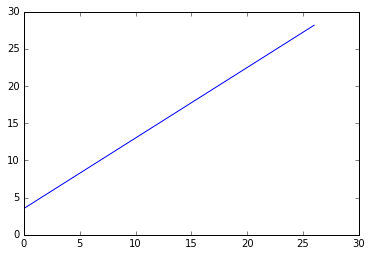

In [122]:
plt.plot(xx,yy)

In [123]:
# Quadtratic Feature
quadratic_featureizer = PolynomialFeatures(degree=2)

In [125]:
quadratic_featureizer.fit_transform(pizza_test[['size']])

array([[   1.,    6.,   36.],
       [   1.,    8.,   64.],
       [   1.,   11.,  121.],
       [   1.,   16.,  256.]])

In [137]:
help(quadratic_featureizer.transform)

Help on method transform in module sklearn.preprocessing.data:

transform(self, X, y=None) method of sklearn.preprocessing.data.PolynomialFeatures instance
    Transform data to polynomial features
    
    Parameters
    ----------
    X : array-like, shape [n_samples, n_features]
        The data to transform, row by row.
    
    Returns
    -------
    XP : np.ndarray shape [n_samples, NP]
        The matrix of features, where NP is the number of polynomial
        features generated from the combination of inputs.



In [126]:
pizza_test[['size']]

,size
0,6
1,8
2,11
3,16


In [127]:
pizza_train_quad = quadratic_featureizer.fit_transform(pizza[['size']])

In [128]:
pizza_test_quad = quadratic_featureizer.fit_transform(pizza_test[['size']])

In [129]:
pizza_train_quad

array([[   1.,    6.,   36.],
       [   1.,    8.,   64.],
       [   1.,   10.,  100.],
       [   1.,   14.,  196.],
       [   1.,   18.,  324.]])

In [130]:
pizza_test_quad

array([[   1.,    6.,   36.],
       [   1.,    8.,   64.],
       [   1.,   11.,  121.],
       [   1.,   16.,  256.]])

In [131]:
pizza

,price,size
0,7.0,6
1,9.0,8
2,13.0,10
3,17.5,14
4,18.0,18


In [132]:
regressor_quad = LinearRegression()

In [133]:
regressor_quad.fit(pizza_train_quad, pizza[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
xx.reshape(xx.shape[0],1)

array([[  0.        ],
       [  0.26262626],
       [  0.52525253],
       [  0.78787879],
       [  1.05050505],
       [  1.31313131],
       [  1.57575758],
       [  1.83838384],
       [  2.1010101 ],
       [  2.36363636],
       [  2.62626263],
       [  2.88888889],
       [  3.15151515],
       [  3.41414141],
       [  3.67676768],
       [  3.93939394],
       [  4.2020202 ],
       [  4.46464646],
       [  4.72727273],
       [  4.98989899],
       [  5.25252525],
       [  5.51515152],
       [  5.77777778],
       [  6.04040404],
       [  6.3030303 ],
       [  6.56565657],
       [  6.82828283],
       [  7.09090909],
       [  7.35353535],
       [  7.61616162],
       [  7.87878788],
       [  8.14141414],
       [  8.4040404 ],
       [  8.66666667],
       [  8.92929293],
       [  9.19191919],
       [  9.45454545],
       [  9.71717172],
       [  9.97979798],
       [ 10.24242424],
       [ 10.50505051],
       [ 10.76767677],
       [ 11.03030303],
       [ 11

In [142]:
regressor.score(pizza[['size']],pizza[['price']])

0.82884278396271616

In [147]:
quadratic_featureizer = PolynomialFeatures(2)

In [148]:
X_train_quad = quadratic_featureizer.fit_transform(pizza[['size']])

In [153]:
X_test_quad = quadratic_featureizer.fit_transform(pizza_test[['size']])

In [154]:
regressor_quad = LinearRegression()

In [155]:
regressor_quad.fit(X_train_quad,pizza[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
regressor_quad.score(X_test_quad, pizza_test[['price']])

0.86754436563450543

In [167]:
xx_quad = quadratic_featureizer.fit_transform(xx.reshape(xx.shape[0],1))
xx.reshape(xx.shape[0],1)

array([[  0.        ],
       [  0.26262626],
       [  0.52525253],
       [  0.78787879],
       [  1.05050505],
       [  1.31313131],
       [  1.57575758],
       [  1.83838384],
       [  2.1010101 ],
       [  2.36363636],
       [  2.62626263],
       [  2.88888889],
       [  3.15151515],
       [  3.41414141],
       [  3.67676768],
       [  3.93939394],
       [  4.2020202 ],
       [  4.46464646],
       [  4.72727273],
       [  4.98989899],
       [  5.25252525],
       [  5.51515152],
       [  5.77777778],
       [  6.04040404],
       [  6.3030303 ],
       [  6.56565657],
       [  6.82828283],
       [  7.09090909],
       [  7.35353535],
       [  7.61616162],
       [  7.87878788],
       [  8.14141414],
       [  8.4040404 ],
       [  8.66666667],
       [  8.92929293],
       [  9.19191919],
       [  9.45454545],
       [  9.71717172],
       [  9.97979798],
       [ 10.24242424],
       [ 10.50505051],
       [ 10.76767677],
       [ 11.03030303],
       [ 11

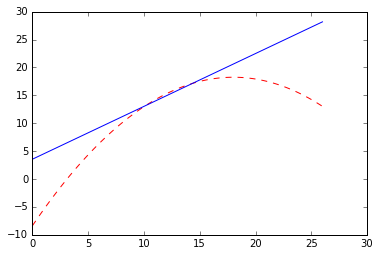

In [169]:
plt.plot(xx,regressor_quad.predict(xx_quad), c='r', linestyle= '--')
plt.plot(xx,regressor.predict(xx.reshape(xx.shape[0],1)))

In [164]:
regressor.score(pizza[['size']], pizza[['price']])

0.82884278396271616